# Prevendo doações de sangue - EstatiDados
![](blood-donation.png)

## 1. Obtendo o dataset

- https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

In [10]:
import pandas as pd
data = pd.read_csv('transfusion.data')
print(data.shape)
data.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### 1.1 Informações sobre os atributos

- **Recency:** Meses desde a última doação;
- **Frequency:** Número total de doações;
- **Monetary:** Sangue total doado;
- **Time:** Meses, desde a primeira doação.
- **whether he/she donated blood in March 2007:** Se doou sangue em março de 2007 `{0:'Não', 1:'Sim'}`

### 1.2 O que é `RFM` e `RFMTC`?

- Técnicas que permitem que você conheça a fundo seu cliente para criar estratégias e campanhas de fidelização.

## 2. Inspecionando o dataframe

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


### 2.1 Alterando o nome da coluna de saída

In [13]:
# Renomeando o nome da coluna de saída
data.rename(columns={'whether he/she donated blood in March 2007':'target'}, inplace=True)

# Visualizando as 5 primeiras linhas do dataframe
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### 2.2 Visualizando a proporção de doadores e não doadores

0    0.762032
1    0.237968
Name: target, dtype: float64


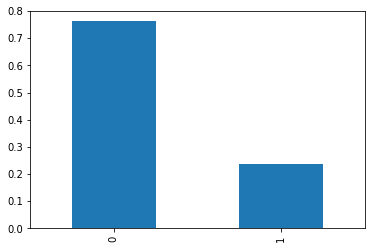

In [15]:
# Visualizando a proporção das classes
print(data.target.value_counts(normalize=True))
data.target.value_counts(normalize=True).plot(kind='bar')

## 3. Preparando os dados para modelagem

In [16]:
# Importando o método train_test_split
from sklearn.model_selection import train_test_split

# Dividindo o dataframe em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='target'), data.target, test_size=0.25, 
                                                   random_state=42, stratify=data.target) 

## 4. Treinando o modelo Linear Regression 

![](logreg-doação-sangue-1.png)

![](logreg-doação-sangue-2.png)

![](logreg-doação-sangue-3.png)

![](log3.png)

In [17]:
# Treinando o modelo de Regressão Logística com o conjunto de treino
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Fazendo predições com os dados de teste
y_pred = logreg.predict(X_test)

## 5. Visualizando a matriz de confusão do modelo

In [19]:
# Importante: primeiro argumento é valor verdadeiro, segundo argumento é valor predito
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[140   3]
 [ 40   4]]


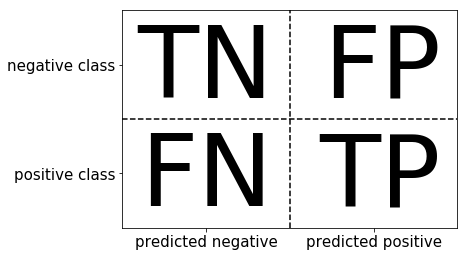

In [20]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

## 6. Insights

- Criar campanhas segmentadas para os grupos de doadores com maior e menor probabilidade de doar novamente em março de 2007;
- Montar estratégias para aumentar o número de doações em períodos específicos;
- Facilitar o controle de estoque;
- Diminuir desperdícios.

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Site: http://viniciusgalvaoia.com.br

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [9]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline